In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import sqrt
import datetime as dt
from scipy.stats import kde

## 1. Use the state data generated in Stage II to fit a distribution to the number of COVID-19 new cases using any of MoM, MLE, and KDE methods.

- Graphically plot the distribution
- Describe the type of distribution and its statistics(Moments of distribution - center, variance, skewness, kurtosis) in the notebook
- Compare the distribution and its statistics to 3 other states of your choosing. Describe if the distributions look         different and what does that imply.

In [2]:
#Reading Transformed Data from Stage II with new cases column
transformed_data = pd.read_csv('../Stage2/transformed_data_with_new_values.csv',parse_dates=['Date'])
transformed_data.head()

,Date,Week,countyFIPS,County_Name,State,StateFIPS,population,Cases,New_Cases,Deaths,New_Deaths
0,2022-06-01,22,1001,Autauga County,AL,1,55869,15969,6,216,0
1,2022-06-01,22,1003,Baldwin County,AL,1,223234,56580,68,683,0
2,2022-06-01,22,1005,Barbour County,AL,1,24686,5710,3,99,0
3,2022-06-01,22,1007,Bibb County,AL,1,22394,6508,8,105,0
4,2022-06-01,22,1009,Blount County,AL,1,57826,15077,4,244,0


In [3]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672388 entries, 0 to 672387
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         672388 non-null  datetime64[ns]
 1   Week         672388 non-null  int64         
 2   countyFIPS   672388 non-null  int64         
 3   County_Name  672388 non-null  object        
 4   State        672388 non-null  object        
 5   StateFIPS    672388 non-null  int64         
 6   population   672388 non-null  int64         
 7   Cases        672388 non-null  int64         
 8   New_Cases    672388 non-null  int64         
 9   Deaths       672388 non-null  int64         
 10  New_Deaths   672388 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 56.4+ MB


Let us take the data for NC State first and plot the histogram for New_Cases value to identify the distribution

In [4]:
#Filtering NC State data
NC_transformed_data = transformed_data.query("State=='NC'").reset_index().drop(columns='index').copy()
NC_transformed_data.head()

,Date,Week,countyFIPS,County_Name,State,StateFIPS,population,Cases,New_Cases,Deaths,New_Deaths
0,2022-06-01,22,37001,Alamance County,NC,37,169509,49188,462,488,0
1,2022-06-01,22,37003,Alexander County,NC,37,37497,10600,41,139,0
2,2022-06-01,22,37005,Alleghany County,NC,37,11137,3041,27,16,0
3,2022-06-01,22,37007,Anson County,NC,37,24446,6672,43,101,0
4,2022-06-01,22,37009,Ashe County,NC,37,27203,6575,43,79,0


In [5]:
NC_transformed_data.New_Cases.min()

0

In [6]:
NC_transformed_data.New_Cases.max()

5266

In [7]:
NC_transformed_data.shape

(21400, 11)

So we have 21400 records of new cases for NC state with values ranging from 0 to 5266

<AxesSubplot:>

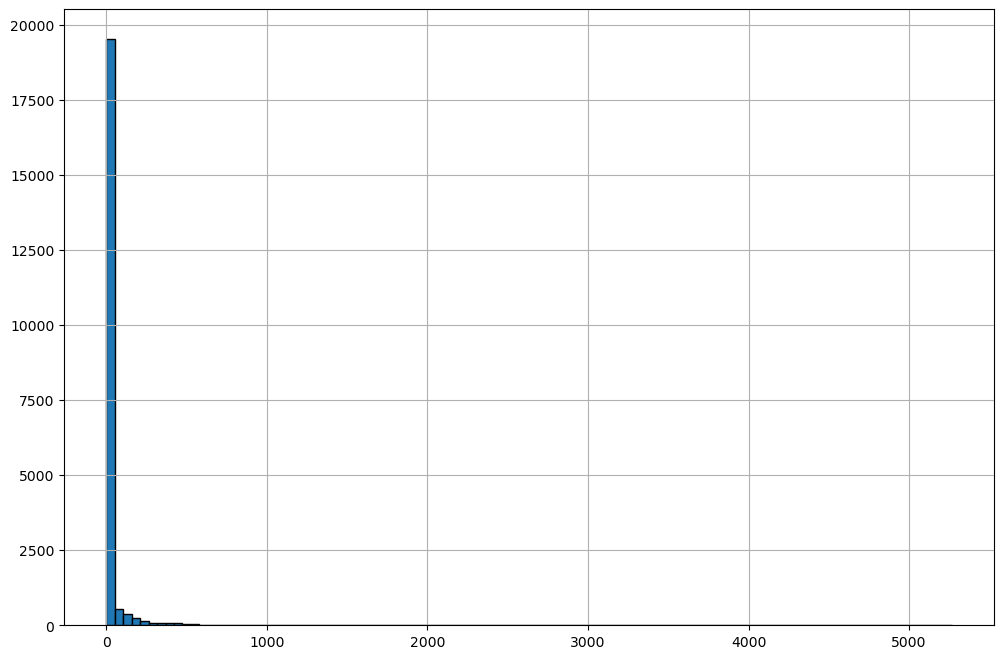

In [8]:
#Plotting histogram
NC_transformed_data.New_Cases.hist(bins=100, ec='black', figsize=(12,8))

Here we can see that 
1. the data is highly positive skewed 
2. With tail to the right
3. Data contains non negative discrete values (Since covid cases can only be an integer n such that n>=0)

With all these information, Poisson Distribution suits well for this case. We can term it as the number of cases occured during a given day period.

#### Fitting Poisson Distribution using MLE

To use Maximum Likelihood Estimator, we need to solve the maximization value for poisson distribution

$$
\frac{\lambda^xe^{-\lambda}}{x!}\,
$$

From the link you provided,
<a href="https://nbviewer.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/max_likelihood_est_distributions.ipynb?create=1"> MLE for Different Distributions </a> We can see the Maximum Likelihood Estimator for Poisson distribution is as follows:

$$ 
\theta = \frac{{\Sigma}_{k=1}^{n}x_k}{n} 
$$

This is simply mean of the values

In [9]:
# Finding Mean of all the new cases
theta = NC_transformed_data.New_Cases.mean()
theta

26.796728971962615

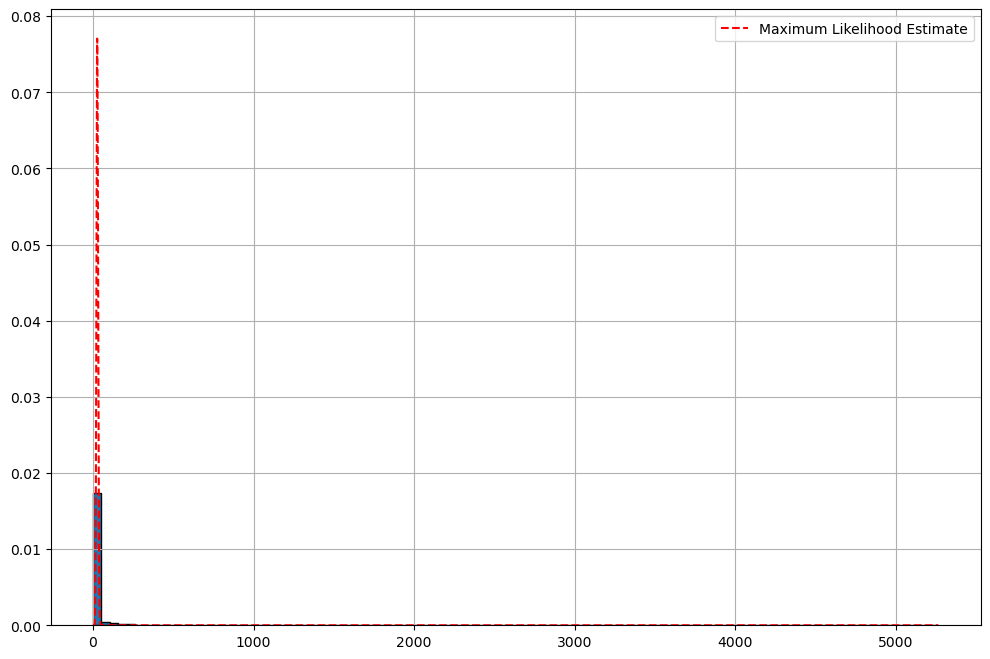

In [10]:
x= np.arange(0,NC_transformed_data.New_Cases.max())
NC_transformed_data.New_Cases.hist(density=True, bins=100, ec='black', figsize=(12,8))
l1,=plt.plot(x, stats.poisson.pmf(x, theta), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])

Here we can see that the distribution plot looks almost similar to the Histogram data. But the density plot didn't fit well. So let us try to fit using KDE

C:\Users\Dell\AppData\Local\Temp\ipykernel_13532\3686681080.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(NC_transformed_data.New_Cases, bw_method=None)


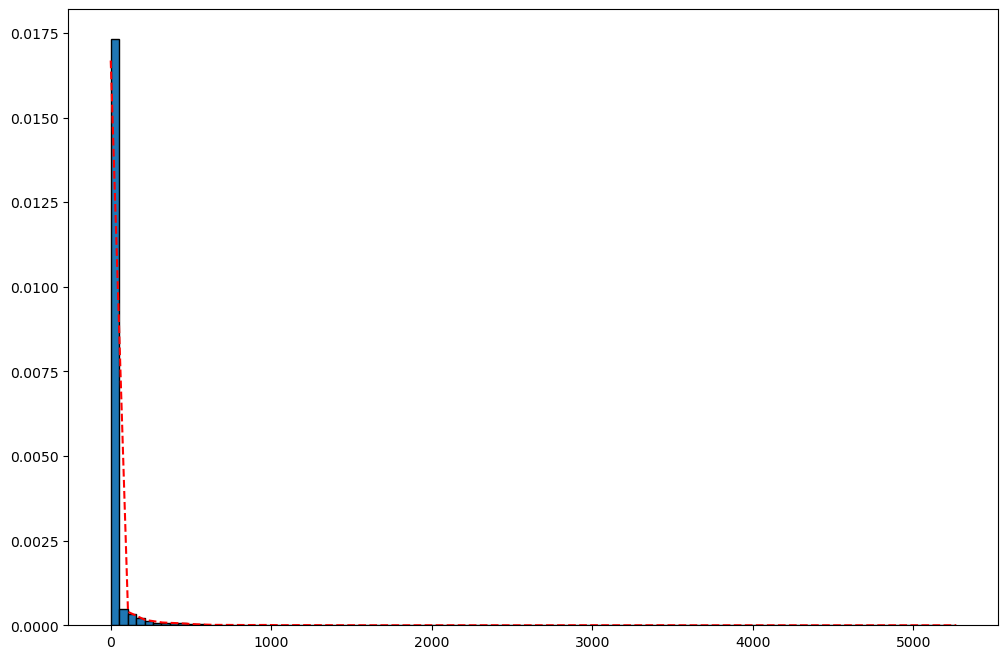

In [11]:
# Fitting density plot using KDE
NC_transformed_data.New_Cases.hist(density=True, bins=100, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, NC_transformed_data.New_Cases.max())
density = kde.gaussian_kde(NC_transformed_data.New_Cases, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'r--')

KDE plot seems to fit more appropriately for this data. Now let us look at the statistics of Poisson distribution for the given data

In [12]:
# Calculating statistics of the distribution using mathematical formulae
# mean = theta
# variance = theta
# skewness = 1/sqrt(theta)
# kurtosis = 1/theta
print(f"mean of the poisson distribution : {theta}")
print(f"Variance of the poisson distribution : {theta}")
print(f"Skewness of the poisson distribution : {1/sqrt(theta)}")
print(f"Kurtosis of the poisson distribution : {1/theta}")

mean of the poisson distribution : 26.796728971962615
Variance of the poisson distribution : 26.796728971962615
Skewness of the poisson distribution : 0.19317864172521376
Kurtosis of the poisson distribution : 0.0373179876187985


In [13]:
# calculating statistics of the distribution using scipy library.
NC_mean, NC_var, NC_skew, NC_kurt = stats.poisson.stats(theta, moments='mvsk')
print(f"mean of the poisson distribution : {NC_mean}")
print(f"Variance of the poisson distribution : {NC_var}")
print(f"Skewness of the poisson distribution : {NC_skew}")
print(f"Kurtosis of the poisson distribution : {NC_kurt}")

mean of the poisson distribution : 26.796728971962615
Variance of the poisson distribution : 26.796728971962615
Skewness of the poisson distribution : 0.19317864172521376
Kurtosis of the poisson distribution : 0.0373179876187985


Now let us do the similar analysis for three other states and compare the values

In [14]:
#Filtering CA, WA, NY State data
Three_state_transformed_data = transformed_data.query("State in ['CA','WA','NY']").reset_index().drop(columns='index').copy()
Three_state_transformed_data.head()

,Date,Week,countyFIPS,County_Name,State,StateFIPS,population,Cases,New_Cases,Deaths,New_Deaths
0,2022-06-01,22,6001,Alameda County,CA,6,1671329,285709,658,1870,0
1,2022-06-01,22,6003,Alpine County,CA,6,1129,128,0,0,0
2,2022-06-01,22,6005,Amador County,CA,6,39752,8820,3,87,0
3,2022-06-01,22,6007,Butte County,CA,6,219186,34122,17,427,0
4,2022-06-01,22,6009,Calaveras County,CA,6,45905,7522,8,121,0


In [15]:
Three_state_transformed_data.New_Cases.min()

0

In [16]:
Three_state_transformed_data.New_Cases.max()

33349

In [17]:
Three_state_transformed_data.shape

(34026, 11)

We have 34026 records of new cases for three states CA, NY and WA combinedly with values ranging from 0 to 33349

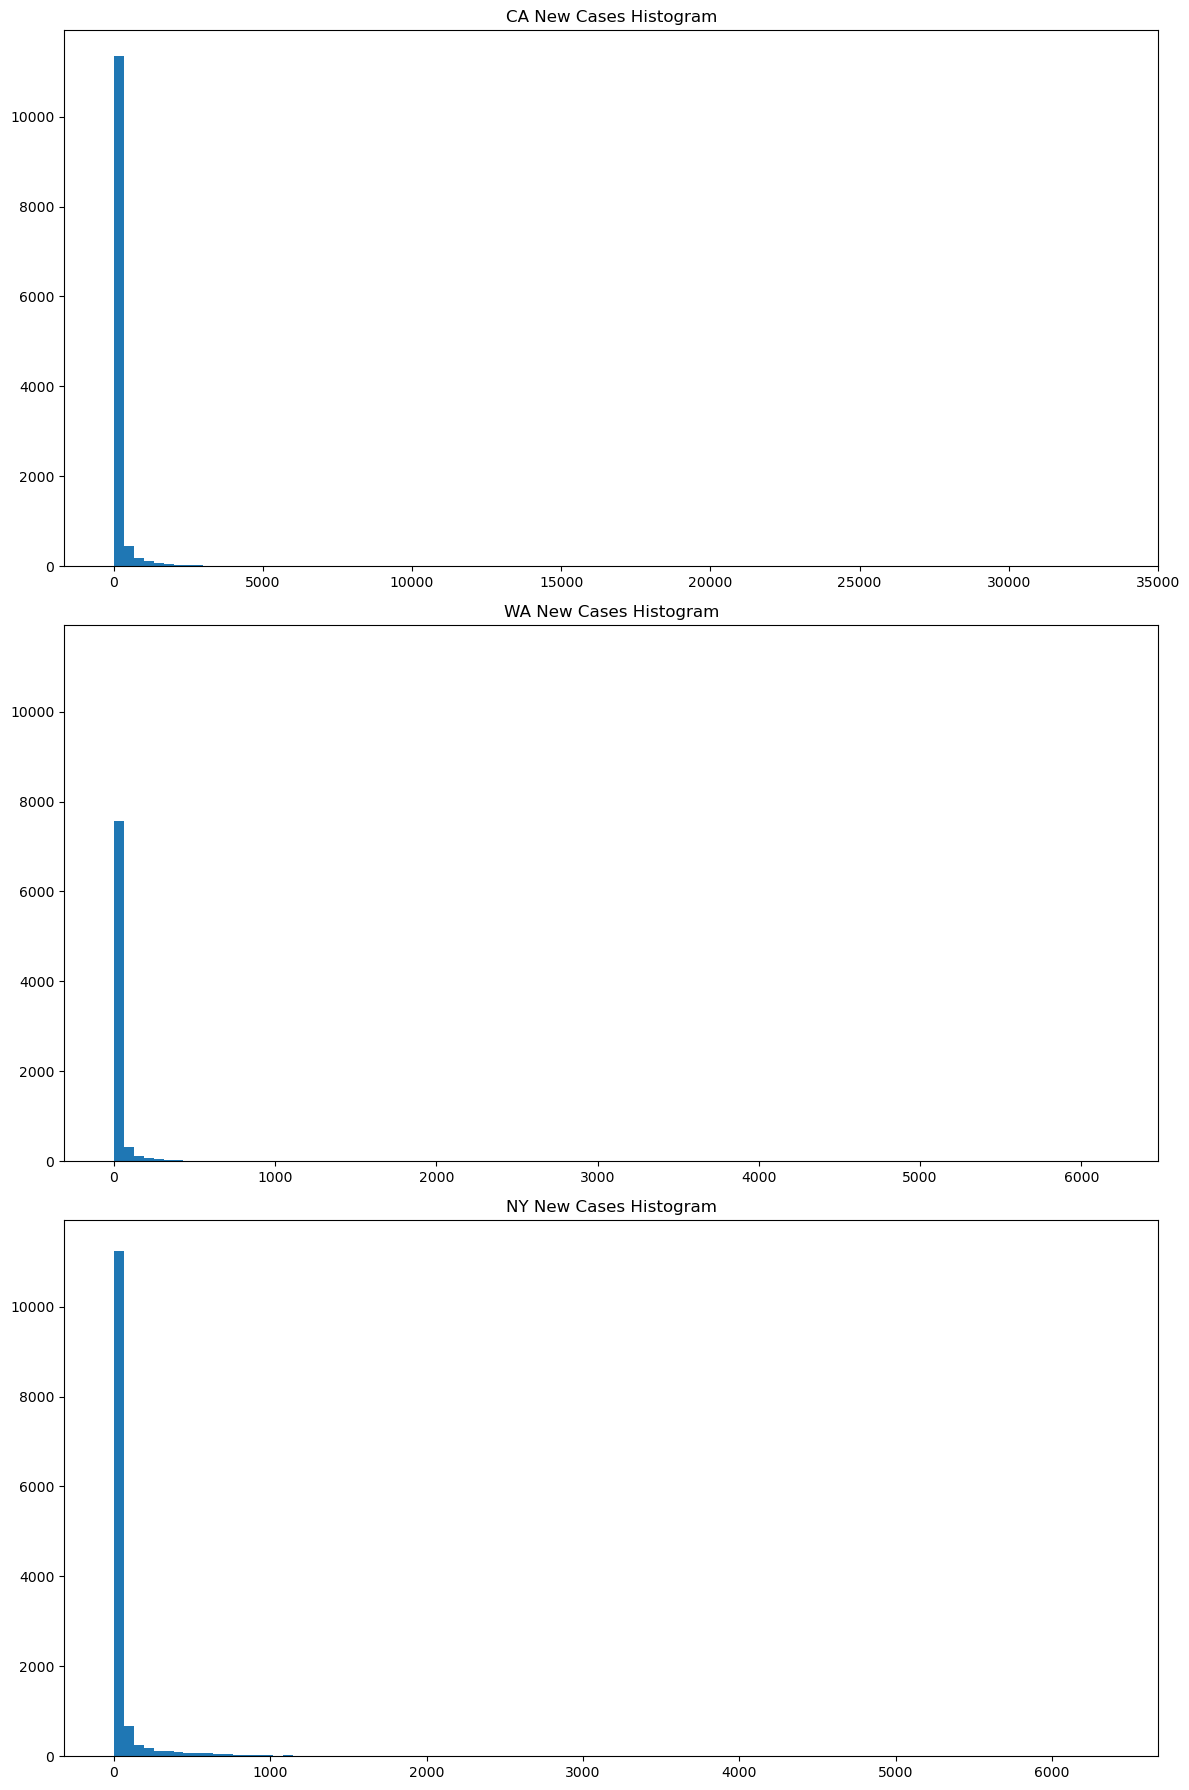

In [18]:
#plotting histogram subplots state wise
states = ['CA','WA','NY']
fig, axs = plt.subplots(len(states), 1, sharey=True, tight_layout=True, figsize=(12,18))
for i, state in enumerate(states):
    axs[i].hist(Three_state_transformed_data.query(f"State=='{state}'").New_Cases, bins=100)
    axs[i].set_title(f"{state} New Cases Histogram")
fig.tight_layout()

All these looks similar to the NC state data with a positive skewness and tail on the right side. Hence fitting poisson distribution to all these states as well

In [19]:
def plot_state_distributions(state):
    new_cases = Three_state_transformed_data.query(f"State=='{state}'").New_Cases
    theta = new_cases.mean()
    x = np.arange(new_cases.max())
    plt.figure(figsize=(12,24))

    plt.subplot(2,1,1)
    new_cases.hist(density=True, bins=100, ec='black', figsize=(12,12))
    l1,=plt.plot(x, stats.poisson.pmf(x, theta), 'r--',  label="Maximum Likelihood Estimate")
    plt.title(f'{state} State Distribution with Poisson fit')
    plt.legend(handles=[l1])


    plt.subplot(2,1,2)
    new_cases.hist(density=True, bins=100, ec='black', figsize=(12,12))
    x = np.linspace(0, new_cases.max())
    density = kde.gaussian_kde(new_cases, bw_method=None)
    xgrid = np.linspace(x.min(), x.max(), 100)
    plt.plot(x, density(x), 'r--')
    plt.title(f'{state} State Distribution with KDE fit')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13532\3660962002.py:17: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(new_cases, bw_method=None)


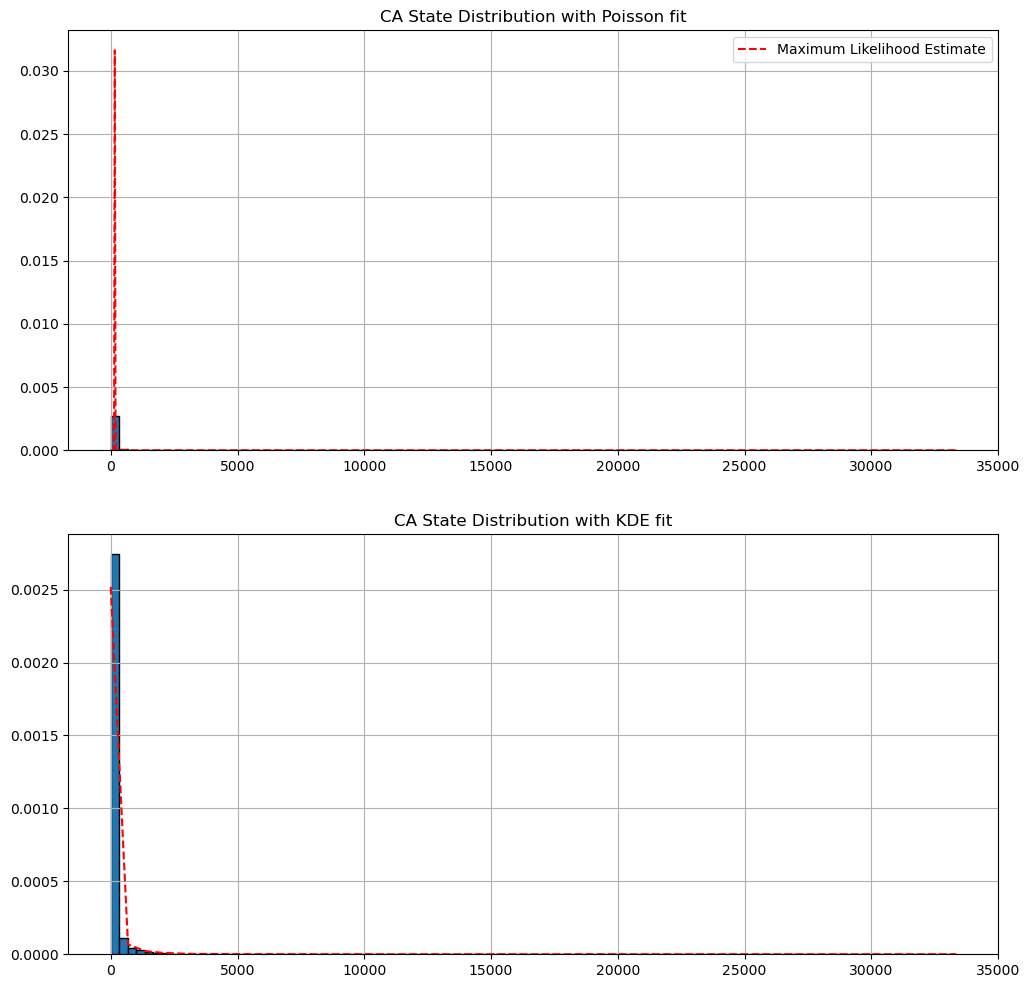

In [20]:
#Plotting Distribution for CA state
plot_state_distributions('CA')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13532\3660962002.py:17: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(new_cases, bw_method=None)


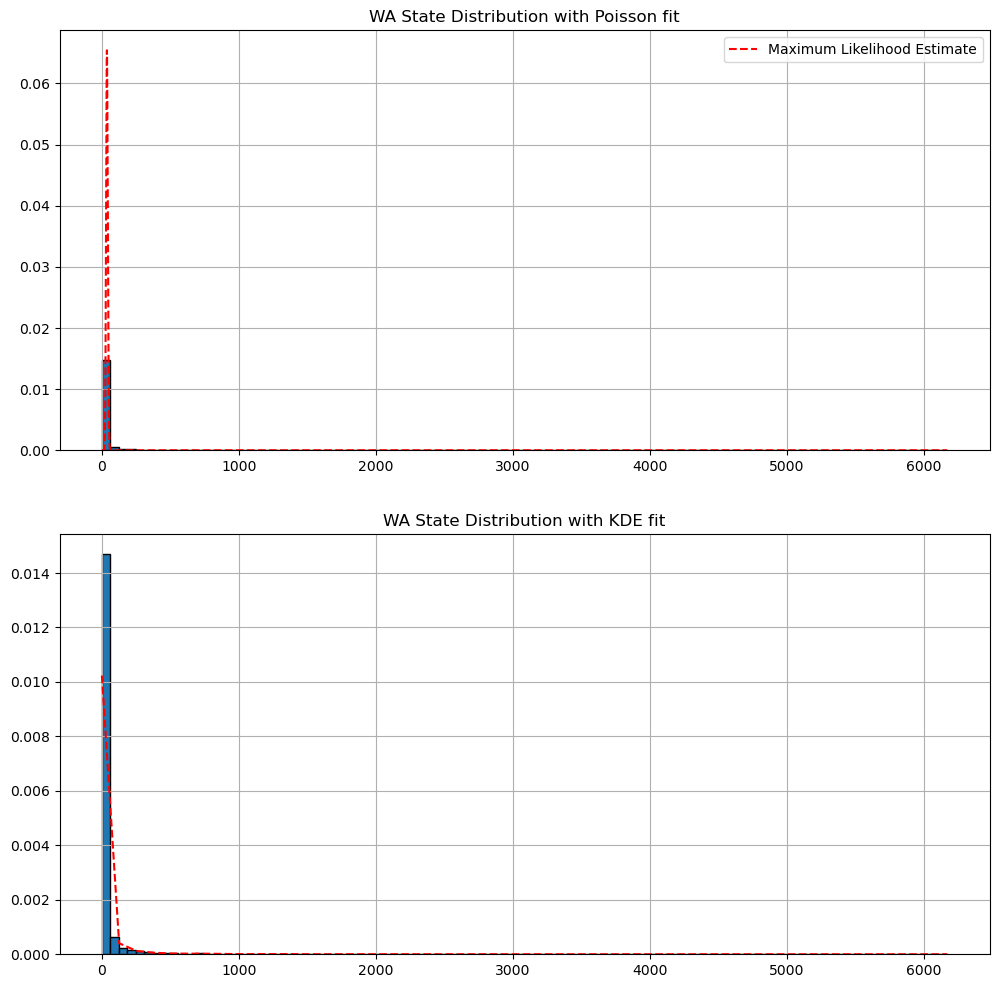

In [21]:
#Plotting Distribution for WA state
plot_state_distributions('WA')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13532\3660962002.py:17: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(new_cases, bw_method=None)


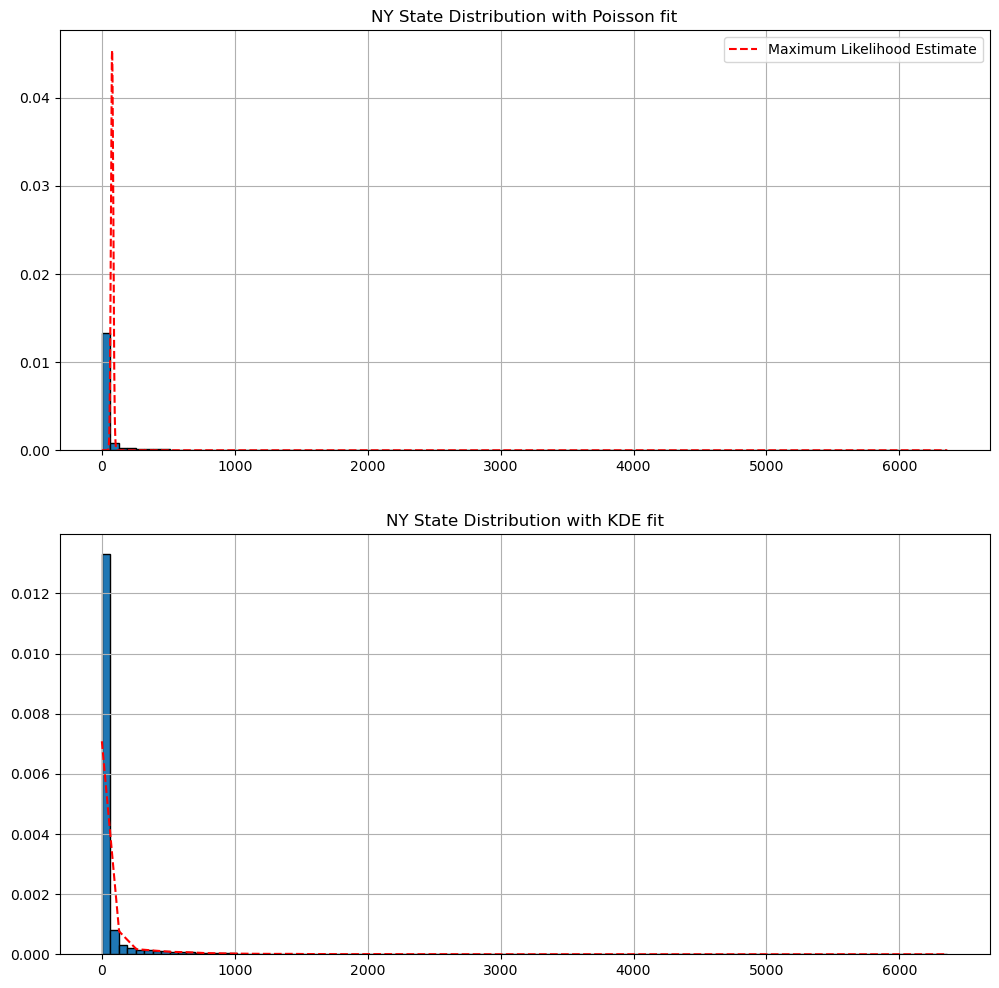

In [22]:
#Plotting Distribution for NY state
plot_state_distributions('NY')

From all the above plots we can see the KDE fits better for this data.

Let us calculate the statistics for the other states as well

In [23]:
def print_stats_for_state(state):
    new_cases = Three_state_transformed_data.query(f"State=='{state}'").New_Cases
    theta = new_cases.mean()
    mean, var, skew, kurt = stats.poisson.stats(theta, moments='mvsk')
    print(f"Stats for the state {state}")
    print("============================")
    print(f"mean : {mean}")
    print(f"Variance : {var}")
    print(f"Skewness : {skew}")
    print(f"Kurtosis : {kurt}")
    print("===========================")
    

In [24]:
print_stats_for_state('CA')
print_stats_for_state('WA')
print_stats_for_state('NY')
print("Stats for the state NC")
print("============================")
print(f"mean : {NC_mean}")
print(f"Variance : {NC_var}")
print(f"Skewness : {NC_skew}")
print(f"Kurtosis : {NC_kurt}")
print("===========================")

Stats for the state CA
mean : 159.12649049307123
Variance : 159.12649049307123
Skewness : 0.07927363225942749
Kurtosis : 0.006284308771602944
Stats for the state WA
mean : 37.15660196501318
Variance : 37.15660196501318
Skewness : 0.16405217964334098
Kurtosis : 0.026913117645731018
Stats for the state NY
mean : 77.33283087126922
Variance : 77.33283087126922
Skewness : 0.11371507596100318
Kurtosis : 0.012931118500816722
Stats for the state NC
mean : 26.796728971962615
Variance : 26.796728971962615
Skewness : 0.19317864172521376
Kurtosis : 0.0373179876187985


When comparing the statistics of all 4 states, 

1. we see that Mean and variance of the distribution is high in California. Indicating more number of cases in CA. 
2. Skewness and Kurtosis values are not very high in all of the states, even though the data appears to be skewed, this result shows that the skewness is less. This seems to be valid since the tail we are having is because of a couple of high numbered values. Which are outliers and most part of the data is close to the mean.



## Based on the results in Stage I, perform corelation between Enrichment data variables and COVID-19 cases to observe any patterns.
    You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [25]:
president_county = pd.read_csv('../../../DATASETS/ENRICHMENT DATASETS/ELECTION_Datasets/president_county.csv')
president_county.head()

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,87025,87025,100
1,Delaware,New Castle County,287633,287633,100
2,Delaware,Sussex County,129352,129352,100
3,District of Columbia,District of Columbia,41681,41681,100
4,District of Columbia,Ward 2,32881,32881,100


In [26]:
president_county_candidate = pd.read_csv('../../../DATASETS/ENRICHMENT DATASETS/ELECTION_Datasets/president_county_candidate.csv')
president_county_candidate.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In the above data we can see that in each county Democratic, Republic and other party candidates, Let us transform the data to create three separate columns for Dem_total_votes, Rep_total_votes and Oth_total_votes to find correlation with covid cases

In [27]:
transformed_president_df = president_county_candidate.copy()
transformed_president_df["Dem_total_votes"] = transformed_president_df.apply(lambda x: x.total_votes if x.party=='DEM' else 0, axis=1)
transformed_president_df["Rep_total_votes"] = transformed_president_df.apply(lambda x: x.total_votes if x.party=='REP' else 0, axis=1)
transformed_president_df["Oth_total_votes"] = transformed_president_df.apply(lambda x: x.total_votes if x.party not in ['DEM','REP'] else 0, axis=1)
transformed_president_df.head()

,state,county,candidate,party,total_votes,won,Dem_total_votes,Rep_total_votes,Oth_total_votes
0,Delaware,Kent County,Joe Biden,DEM,44552,True,44552,0,0
1,Delaware,Kent County,Donald Trump,REP,41009,False,0,41009,0
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,0,0,1044
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,0,0,420
4,Delaware,New Castle County,Joe Biden,DEM,195034,True,195034,0,0


In [28]:
transformed_president_df=transformed_president_df.groupby(by=['state','county']).sum(numeric_only=True).reset_index().drop(columns=['won'])
transformed_president_df.head()

,state,county,total_votes,Dem_total_votes,Rep_total_votes,Oth_total_votes
0,Alabama,Autauga County,27770,7503,19838,429
1,Alabama,Baldwin County,109679,24578,83544,1557
2,Alabama,Barbour County,10518,4816,5622,80
3,Alabama,Bibb County,9595,1986,7525,84
4,Alabama,Blount County,27588,2640,24711,237


In [29]:
super_covid_data = pd.read_csv('../../../DATASETS/SUPER DATASETS/superCovidDS.csv')
super_covid_data = super_covid_data.rename(columns={"County Name":"County_Name"})
super_covid_data.head()

,countyFIPS,County_Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-01-08_y,2023-01-09_y,2023-01-10_y,2023-01-11_y,2023-01-12_y,2023-01-13_y,2023-01-14_y,2023-01-15_y,2023-01-16_y,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,721,721,721,721,721,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,260,260,260,260,261,261,261,261,261,57826


In [30]:
print(super_covid_data.columns[4])
print(super_covid_data.columns[-2])

2020-01-22_x
2023-01-16_y


In [31]:
# Creating transformed Covid data for a given state
def get_transformed_covid_data_for_state(state):
    filtered_super_covid_data = super_covid_data.query(f"State=='{state}'")
    transformed_super_covid_df = pd.DataFrame(columns=['Date','County_Name', 'State', 'population', 'Cases'])
    start_date = dt.datetime(2020,1,22)
    end_date = dt.datetime(2023,1,16)
    date_series = pd.date_range(start_date, end_date, freq='d')
    date_delta = dt.timedelta(days=1)
    for date in date_series:
        data = []
        for _ , row in filtered_super_covid_data.iterrows():
            temp = [date, getattr(row, 'County_Name').strip(), getattr(row, 'State'), getattr(row, 'population')]
            cases_column = date.strftime('%Y-%m-%d_x')
            temp.append(getattr(row, cases_column))
            data.append(temp)
        transformed_super_covid_df = pd.concat([transformed_super_covid_df, pd.DataFrame(data, columns=transformed_super_covid_df.columns)])
    return transformed_super_covid_df

In [32]:
NC_transformed_covid = get_transformed_covid_data_for_state('NC')
NC_transformed_covid['State']='North Carolina'
display(NC_transformed_covid.head())
NC_transformed_covid.shape

,Date,County_Name,State,population,Cases
0,2020-01-22,Alamance County,North Carolina,169509,0
1,2020-01-22,Alexander County,North Carolina,37497,0
2,2020-01-22,Alleghany County,North Carolina,11137,0
3,2020-01-22,Anson County,North Carolina,24446,0
4,2020-01-22,Ashe County,North Carolina,27203,0


(109100, 5)

In [33]:
transformed_president_df.query("state=='North Carolina'")

,state,county,total_votes,Dem_total_votes,Rep_total_votes,Oth_total_votes
3115,North Carolina,Alamance County,86091,38825,46056,1210
3116,North Carolina,Alexander County,20236,4145,15888,203
3117,North Carolina,Alleghany County,6076,1486,4527,63
3118,North Carolina,Anson County,11194,5789,5321,84
3119,North Carolina,Ashe County,15814,4164,11451,199
...,...,...,...,...,...,...
3210,North Carolina,Wayne County,55537,24215,30709,613
3211,North Carolina,Wilkes County,35466,7511,27592,363
3212,North Carolina,Wilson County,40735,20754,19581,400
3213,North Carolina,Yadkin County,19923,3763,15933,227


In [34]:
NC_covid_president_data = pd.merge(NC_transformed_covid, transformed_president_df.query("state=='North Carolina'"),
         how='left', left_on='County_Name', right_on='county')
NC_covid_president_data = NC_covid_president_data.drop(columns=['county','state'])
# Grouping by data to find the central value for the Cases
NC_covid_president_data = NC_covid_president_data.groupby(by=['County_Name','State','population']).aggregate({'Cases': np.mean, 
                                                                              'total_votes': max, 
                                                                              'Dem_total_votes': max,
                                                                              'Rep_total_votes': max,
                                                                              'Oth_total_votes': max
                                                                             }).reset_index()
NC_covid_president_data['Cases'] = NC_covid_president_data['Cases'].apply(lambda x: int(x))
display(NC_covid_president_data.head())
NC_covid_president_data.shape

,County_Name,State,population,Cases,total_votes,Dem_total_votes,Rep_total_votes,Oth_total_votes
0,Alamance County,North Carolina,169509,25361,86091,38825,46056,1210
1,Alexander County,North Carolina,37497,5625,20236,4145,15888,203
2,Alleghany County,North Carolina,11137,1543,6076,1486,4527,63
3,Anson County,North Carolina,24446,3535,11194,5789,5321,84
4,Ashe County,North Carolina,27203,3210,15814,4164,11451,199


(100, 8)

In [35]:
NC_covid_president_data = pd.merge(NC_covid_president_data, president_county.query("state=='North Carolina'")[['county','current_votes','total_votes']], how='left', left_on='County_Name',right_on='county')
NC_covid_president_data = NC_covid_president_data.rename(columns={'total_votes_y':'total_votes'})
NC_covid_president_data = NC_covid_president_data.drop(columns=["total_votes_x", "county"])
NC_covid_president_data["Vote_Percent"] = 100*NC_covid_president_data["current_votes"]/NC_covid_president_data["total_votes"]
NC_covid_president_data.head()

,County_Name,State,population,Cases,Dem_total_votes,Rep_total_votes,Oth_total_votes,current_votes,total_votes,Vote_Percent
0,Alamance County,North Carolina,169509,25361,38825,46056,1210,86091,86091,100.00000
1,Alexander County,North Carolina,37497,5625,4145,15888,203,20236,20236,100.00000
2,Alleghany County,North Carolina,11137,1543,1486,4527,63,6076,6076,100.00000
3,Anson County,North Carolina,24446,3535,5789,5321,84,11194,11205,99.90183
4,Ashe County,North Carolina,27203,3210,4164,11451,199,15814,15814,100.00000


In [36]:
#Normalizing the data with population for 1M people
NC_covid_president_data['Cases'] = (1000000 * NC_covid_president_data['Cases']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data['total_votes'] = (1000000 * NC_covid_president_data['total_votes']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data['current_votes'] = (1000000 * NC_covid_president_data['current_votes']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data['Dem_total_votes'] = (1000000 * NC_covid_president_data['Dem_total_votes']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data['Rep_total_votes'] = (1000000 * NC_covid_president_data['Rep_total_votes']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data['Oth_total_votes'] = (1000000 * NC_covid_president_data['Oth_total_votes']/NC_covid_president_data['population']).apply(lambda x: int(x))
NC_covid_president_data.head()

,County_Name,State,population,Cases,Dem_total_votes,Rep_total_votes,Oth_total_votes,current_votes,total_votes,Vote_Percent
0,Alamance County,North Carolina,169509,149614,229043,271702,7138,507884,507884,100.00000
1,Alexander County,North Carolina,37497,150012,110542,423713,5413,539669,539669,100.00000
2,Alleghany County,North Carolina,11137,138547,133429,406482,5656,545568,545568,100.00000
3,Anson County,North Carolina,24446,144604,236807,217663,3436,457907,458357,99.90183
4,Ashe County,North Carolina,27203,118001,153071,420946,7315,581332,581332,100.00000


In [37]:
NC_covid_president_data.corr()

,population,Cases,Dem_total_votes,Rep_total_votes,Oth_total_votes,current_votes,total_votes,Vote_Percent
population,1.000000,0.035008,0.381556,-0.346206,0.363087,-0.015851,-0.016276,0.032280
Cases,0.035008,1.000000,-0.333223,-0.039499,-0.491957,-0.486522,-0.487556,-0.025898
Dem_total_votes,0.381556,-0.333223,1.000000,-0.741393,0.147517,0.167597,0.168128,-0.005377
Rep_total_votes,-0.346206,-0.039499,-0.741393,1.000000,0.174355,0.536930,0.536394,0.171888
Oth_total_votes,0.363087,-0.491957,0.147517,0.174355,1.000000,0.471662,0.473106,-0.012776
current_votes,-0.015851,-0.486522,0.167597,0.536930,0.471662,1.000000,0.999936,0.241139
total_votes,-0.016276,-0.487556,0.168128,0.536394,0.473106,0.999936,1.000000,0.230120
Vote_Percent,0.032280,-0.025898,-0.005377,0.171888,-0.012776,0.241139,0.230120,1.000000


From the above correlation matrix, we can identify the **below correlation values**


- **Cases - Vote_Percent : -0.03 approximately**
- **Cases - Dem_total_votes : -0.33 approximately**
- **Cases - Rep_total_votes : -0.04 approximately**
- **Cases - Oth_total_votes : -0.49 approximately**

#### Hypothesis

1. Here **Vote_Percent** is the percentage of people came to vote of the total people with vote eligibility. The vote percent is negligibly negatively correlated with covid cases. **So the data shows that there is not a significant difference in the change in vote percent with the number of covid cases**


2. Other parties total votes is moderately negatively correlated with Covid cases. **So the data shows that in the regions with high covid cases, other parites received moderately less votes when compared to the regions with less covid cases**


3. Republic party total votes is negligibly negatively correlated with covid cases. **So the data shows that there is not a significant difference in the change of total votes received by republic party in regions with high covid cases when compared to the regions with fewer covid cases**


4. Democratic party total votes is moderately negatively correlated with covid cases. **So the data shows that in the regions with high covid cases, democratic party received moderately less votes when compared to the regions with fewer covid cases**